In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

In [2]:
house = pd.read_csv('train.csv', index_col='Id')
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [3]:
house

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [4]:
house.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [5]:
null = house.isnull().sum()
print(null[null>0].sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [6]:
def pre_process(house):
    house=house.drop(['MiscFeature','PoolQC','Fence','Alley'],axis=1)
    num_house=house.select_dtypes(include='number')
    num_cols=num_house.columns
    #process numeric columns
    for col in num_cols:
        house[col]=house[col].fillna(house[col].median())
    
    #process string cols
    str_house=house.select_dtypes(include='object')
    str_cols=str_house.columns
    for col in str_cols:
        house[col]=house[col].fillna(house['LotShape'].value_counts().idxmax())
    
    #factorize str cols
    for col in str_cols:
        house[col]=pd.factorize(house[col])[0]  
    
    #return the processed dataframe
    return house

In [7]:
new_house=pre_process(house)
new_house.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
Id                                                                              
1           60         0         65.0     8450       0         0            0   
2           20         0         80.0     9600       0         0            0   
3           60         0         68.0    11250       0         1            0   
4           70         0         60.0     9550       0         1            0   
5           60         0         84.0    14260       0         1            0   

    Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
Id                                   ...                             
1           0          0          0  ...              0          0   
2           0          1          0  ...              0          0   
3           0          0          0  ...              0          0   
4           0          2          0  ...            272          0   
5           0          1          0  ...              0          0   

    ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
Id                                                                            
1             0         0        0       2    2008         0              0   
2             0         0        0       5    2007         0              0   
3             0         0        0       9    2008         0              0   
4             0         0        0       2    2006         0              1   
5             0         0        0      12    2008         0              0   

    SalePrice  
Id             
1      208500  
2      181500  
3      223500  
4      140000  
5      250000  

[5 rows x 76 columns]

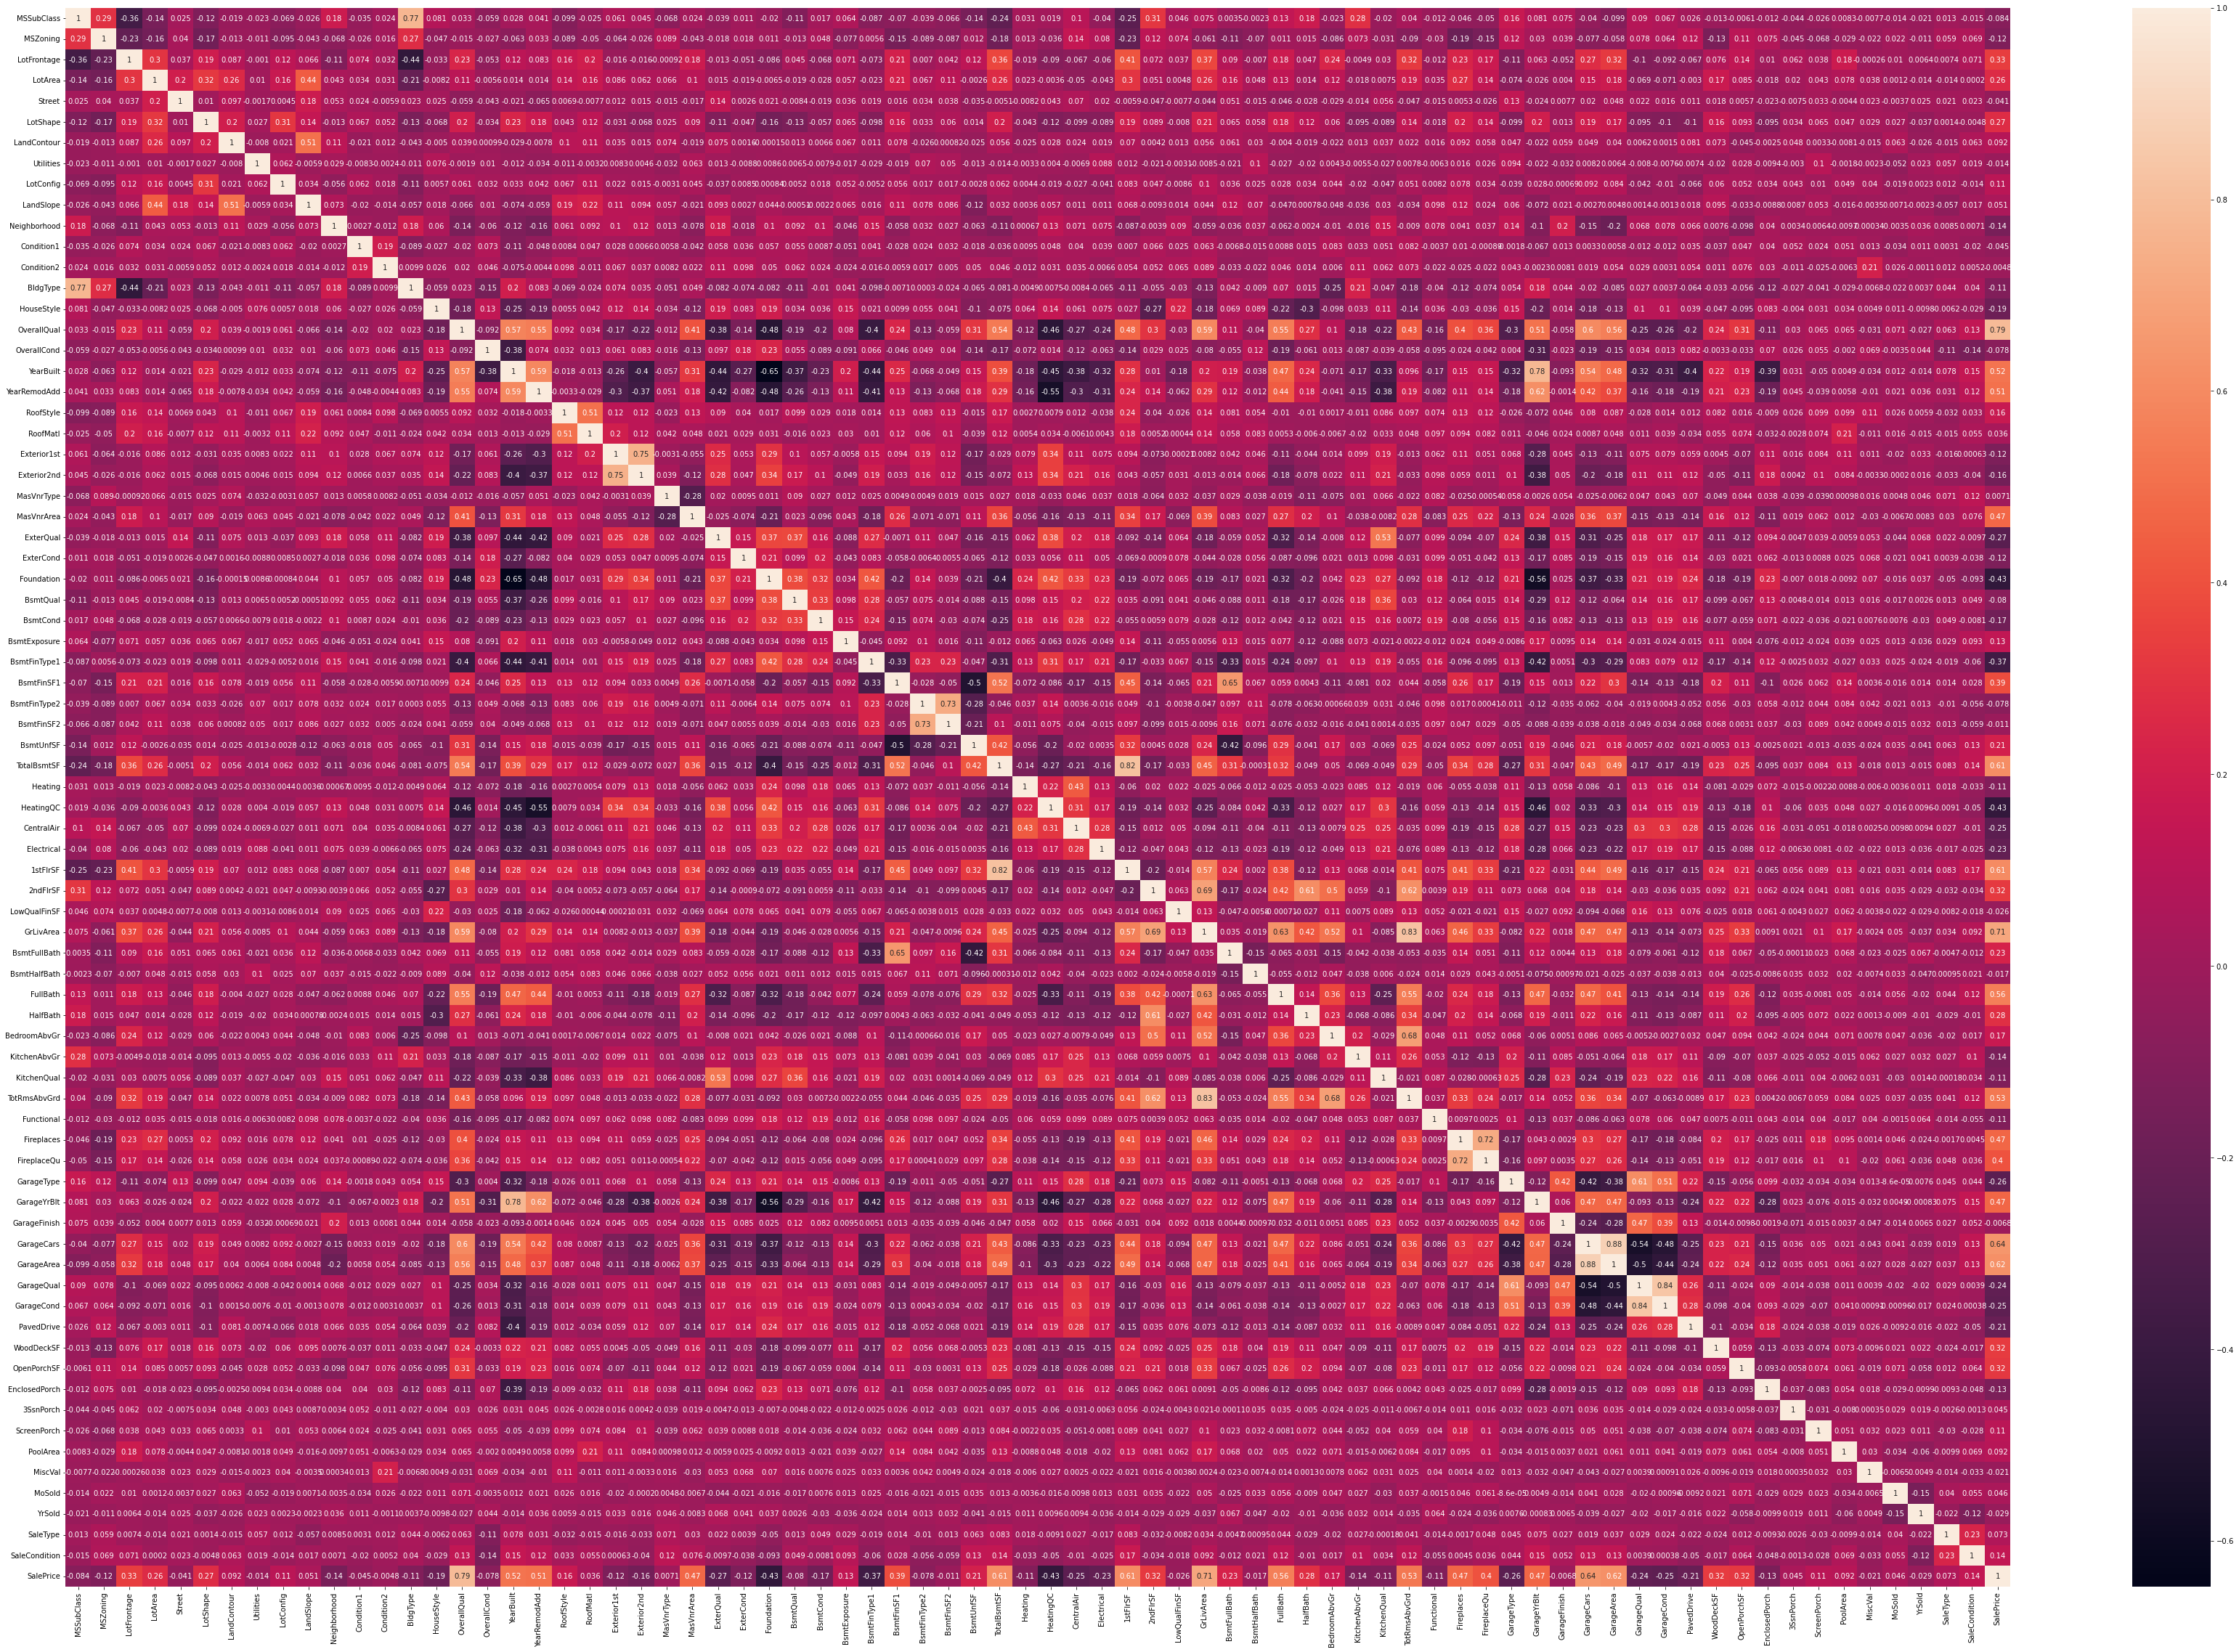

In [8]:
plt.figure(figsize=(60,40))
sns.heatmap(new_house.corr(),annot=True)
plt.show()

In [9]:
eda_cols_house=['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','SalePrice']
eda_house=house[eda_cols_house]
eda_house

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  \
Id                                                                              
1               7       2003          2003       196.0          856       856   
2               6       1976          1976         0.0         1262      1262   
3               7       2001          2002       162.0          920       920   
4               7       1915          1970         0.0          756       961   
5               8       2000          2000       350.0         1145      1145   
...           ...        ...           ...         ...          ...       ...   
1456            6       1999          2000         0.0          953       953   
1457            6       1978          1988       119.0         1542      2073   
1458            7       1941          2006         0.0         1152      1188   
1459            5       1950          1996         0.0         1078      1078   
1460            5       1965          1965         0.0         1256      1256   

      GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
Id                                                                             
1          1710         2             8           0       2003.0           2   
2          1262         2             6           1       1976.0           2   
3          1786         2             6           1       2001.0           2   
4          1717         1             7           1       1998.0           3   
5          2198         2             9           1       2000.0           3   
...         ...       ...           ...         ...          ...         ...   
1456       1647         2             7           1       1999.0           2   
1457       2073         2             7           2       1978.0           2   
1458       2340         2             9           2       1941.0           1   
1459       1078         1             5           0       1950.0           1   
1460       1256         1             6           0       1965.0           1   

      GarageArea  SalePrice  
Id                           
1            548     208500  
2            460     181500  
3            608     223500  
4            642     140000  
5            836     250000  
...          ...        ...  
1456         460     175000  
1457         500     210000  
1458         252     266500  
1459         240     142125  
1460         276     147500  

[1460 rows x 14 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


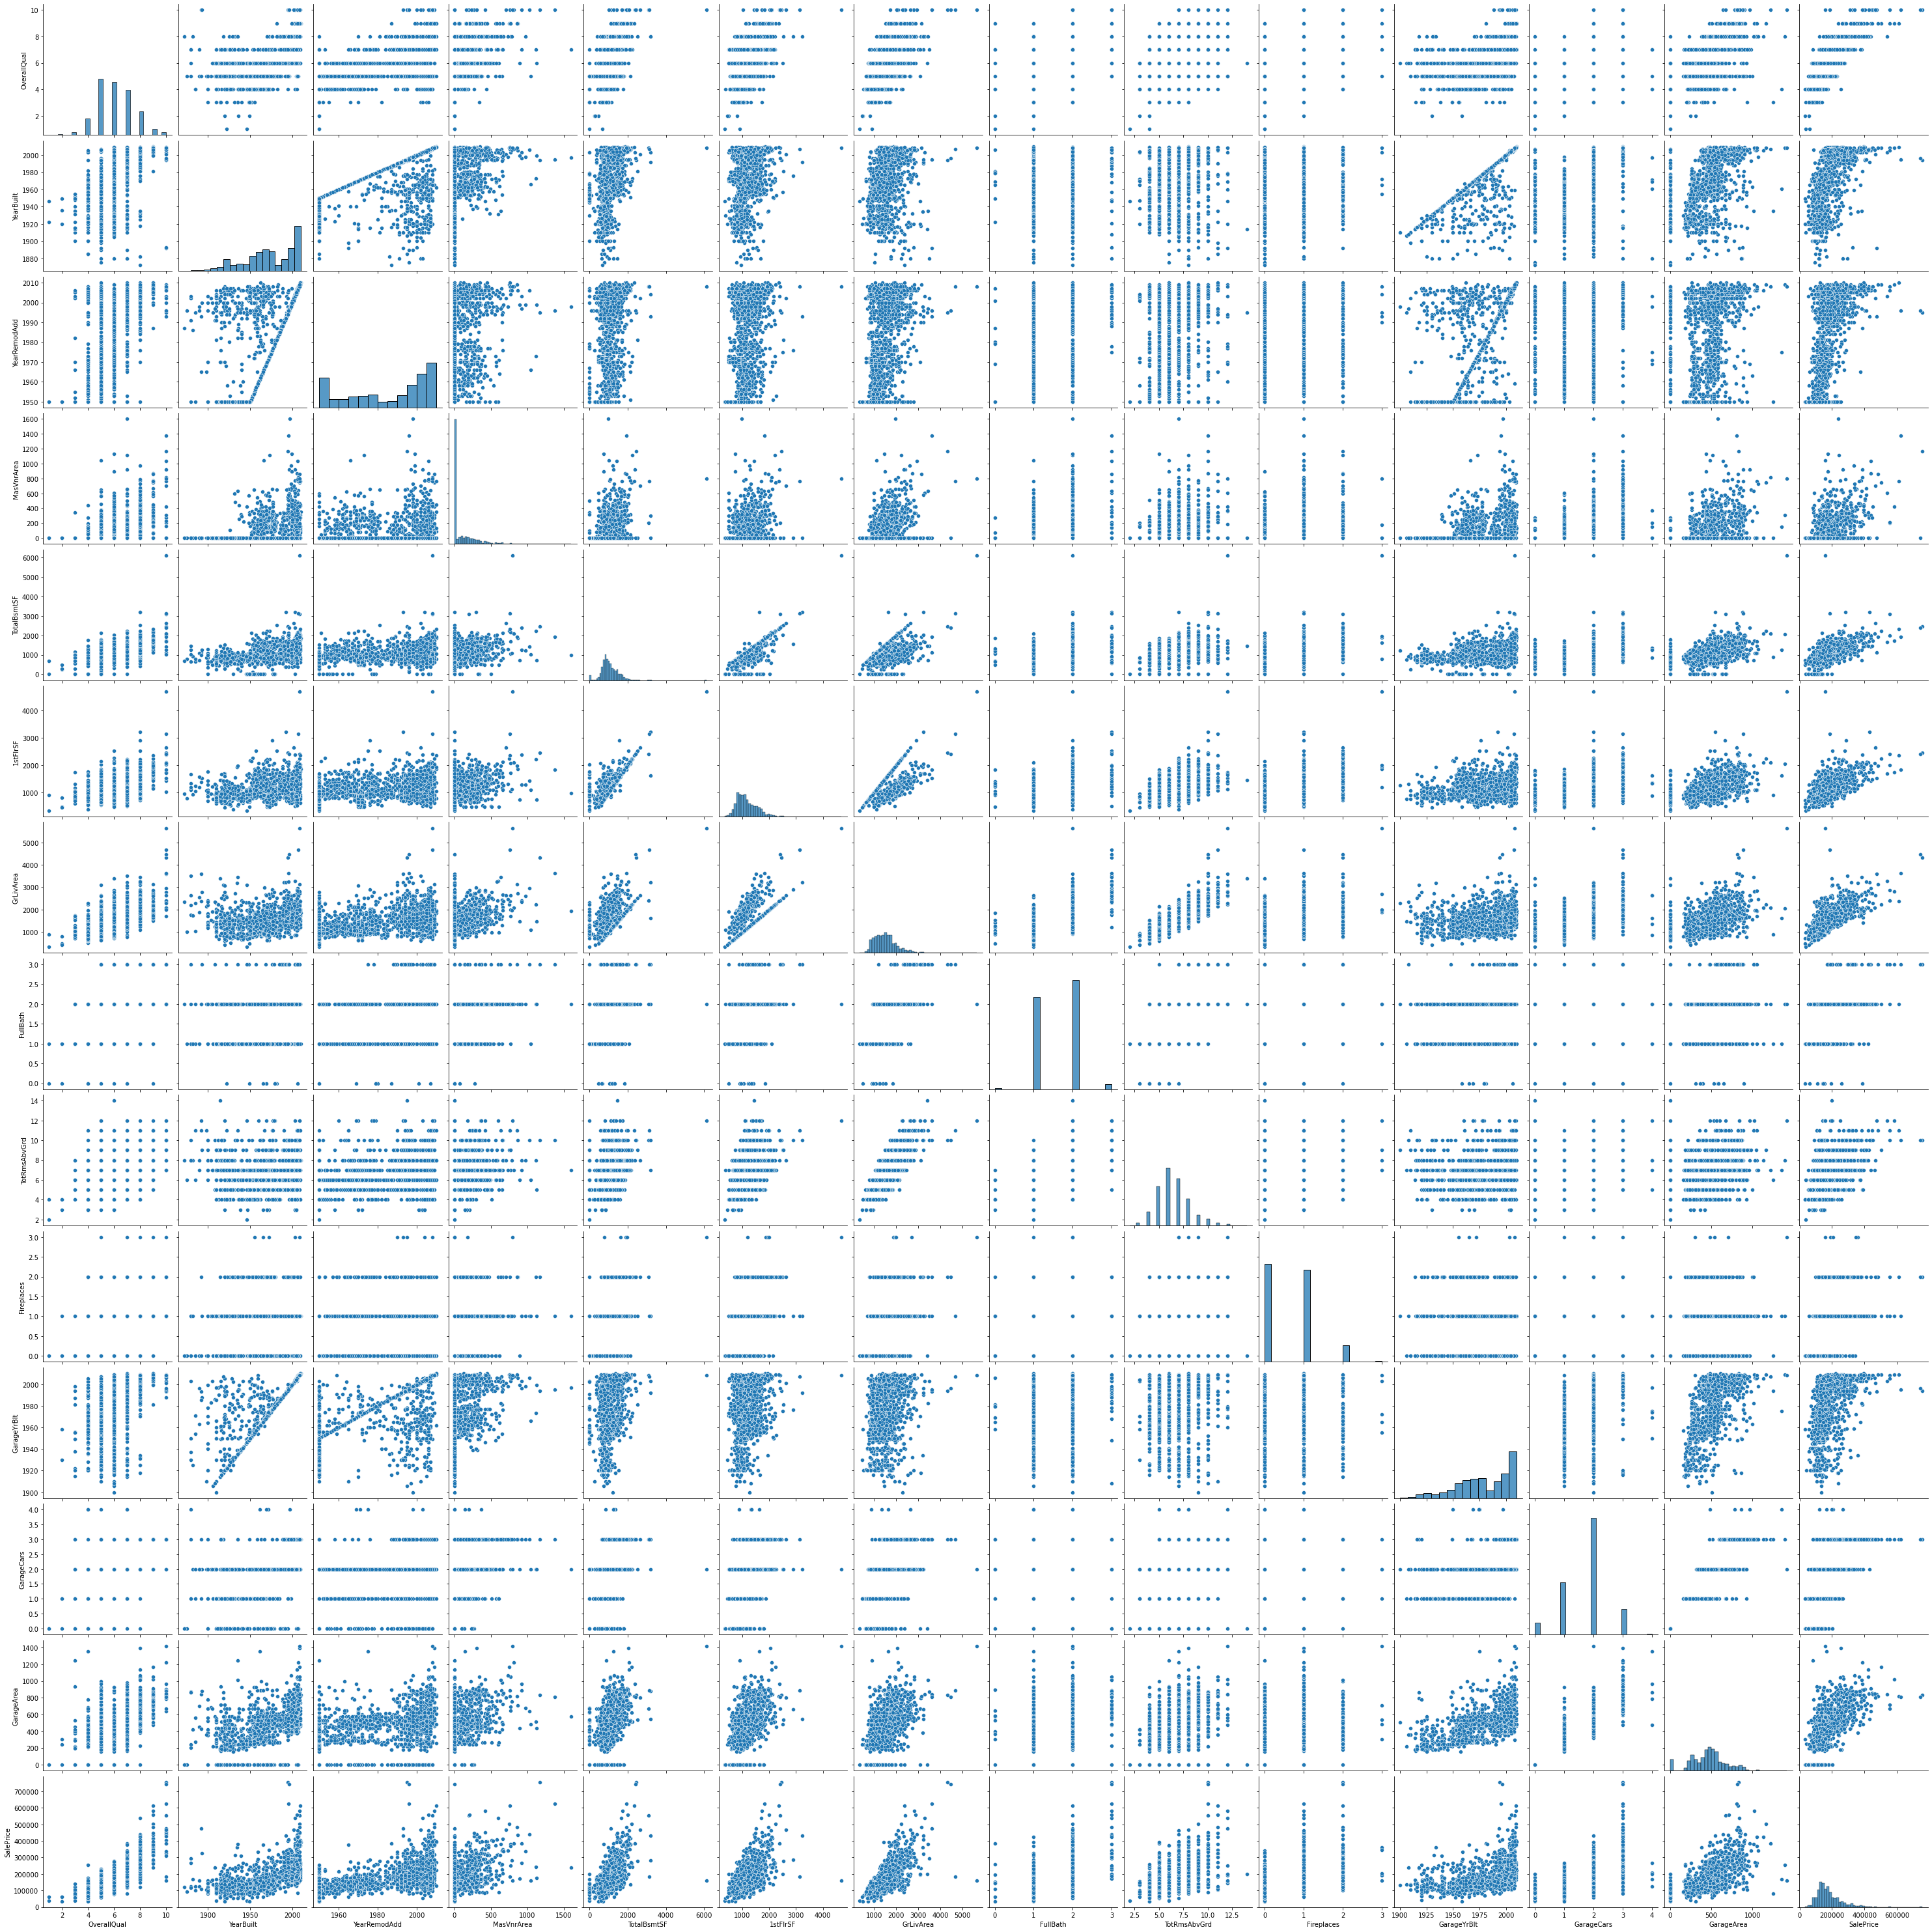

In [10]:
sns.pairplot(eda_house,size=3);
plt.show()

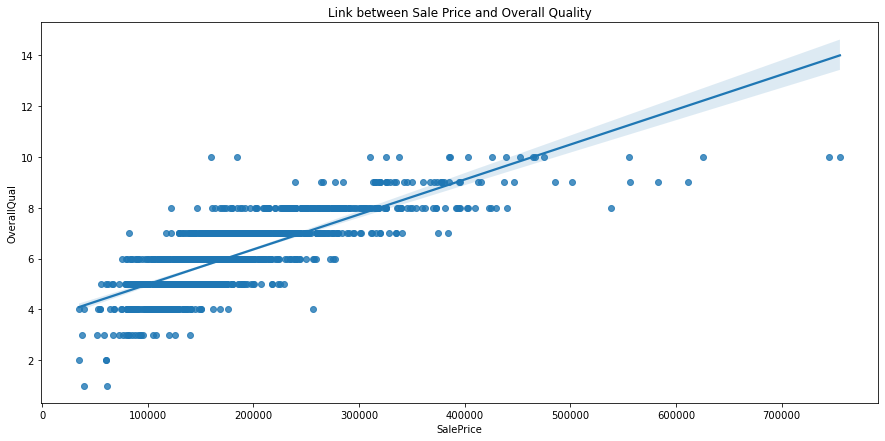

In [11]:
plt.figure(figsize=(15,7))
sns.regplot(data=eda_house,x='SalePrice',y='OverallQual')
plt.title('Link between Sale Price and Overall Quality')
plt.show()

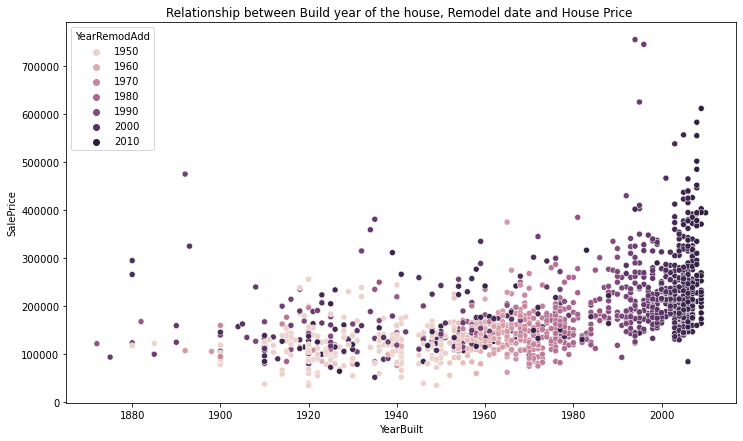

In [12]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=eda_house,x='YearBuilt',y='SalePrice',hue='YearRemodAdd')
plt.title('Relationship between Build year of the house, Remodel date and House Price ')
plt.show()

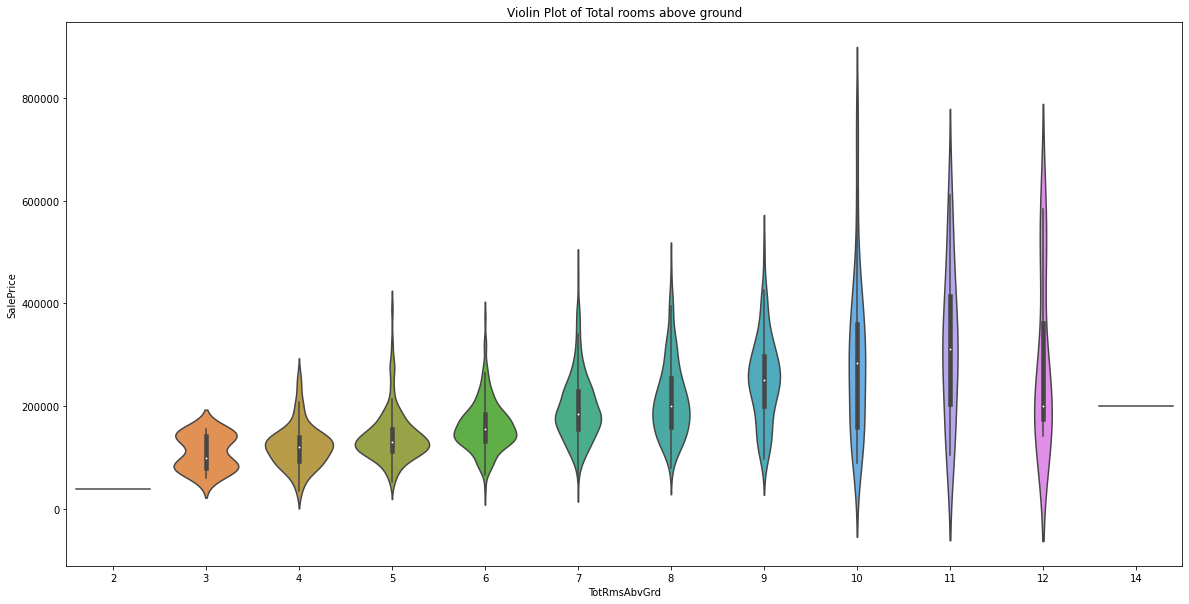

In [13]:
plt.figure(figsize=(20,10))
sns.violinplot(data=eda_house,x='TotRmsAbvGrd',y='SalePrice')
plt.title('Violin Plot of Total rooms above ground')
plt.show()

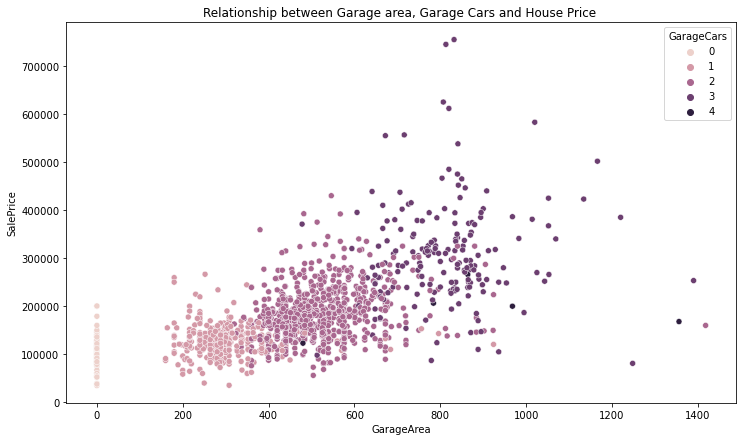

In [14]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=eda_house,x='GarageArea',y='SalePrice',hue='GarageCars')
plt.title('Relationship between Garage area, Garage Cars and House Price ')
plt.show()

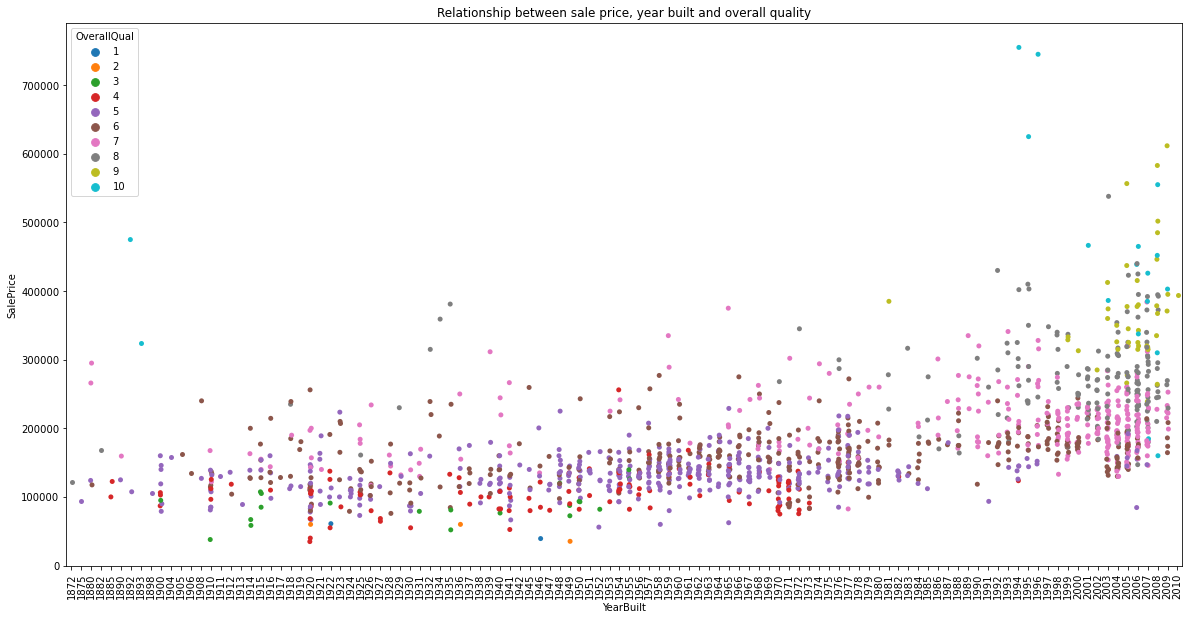

In [15]:
plt.figure(figsize=(20,10))
sns.stripplot(data=eda_house,x='YearBuilt',y='SalePrice',hue='OverallQual')
plt.xticks(rotation=90)
plt.title('Relationship between sale price, year built and overall quality')
plt.show()

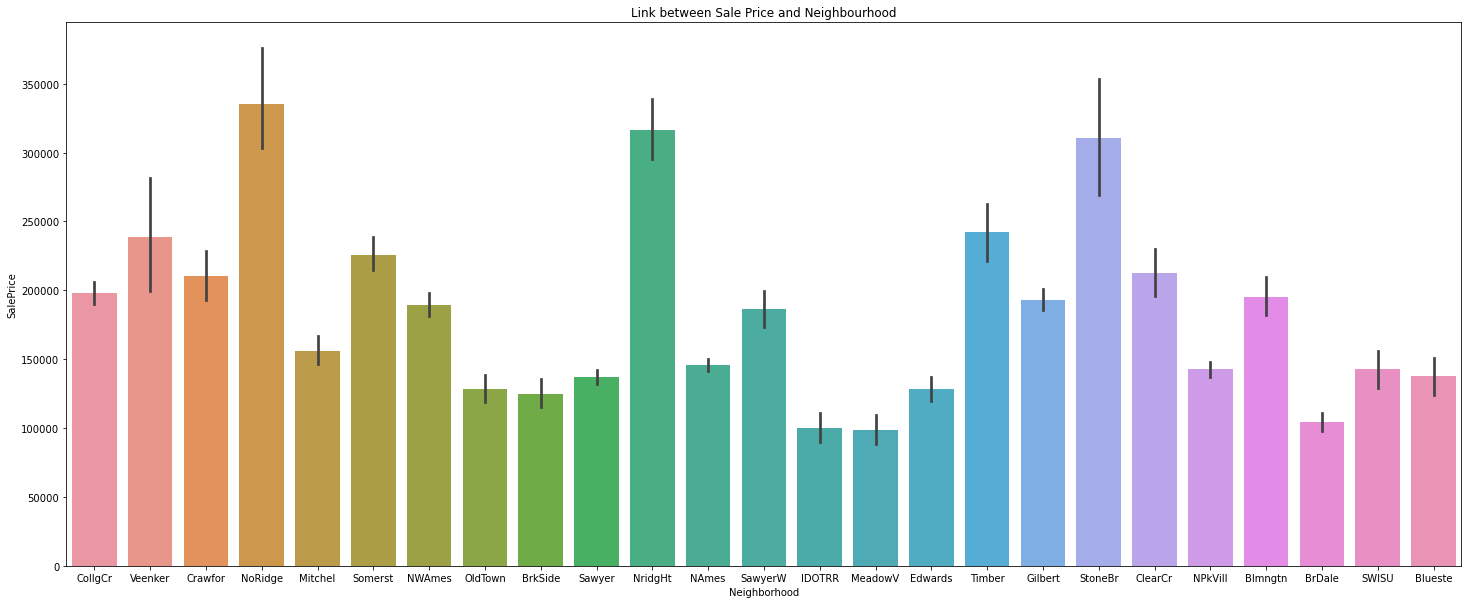

In [23]:
plt.figure(figsize=(25,10))
sns.barplot(data=house,x='Neighborhood',y='SalePrice')
plt.title('Link between Sale Price and Neighbourhood')
plt.show()

In [27]:
print(house['SalePrice'].agg([np.mean, np.median]))

mean      180921.19589
median    163000.00000
Name: SalePrice, dtype: float64


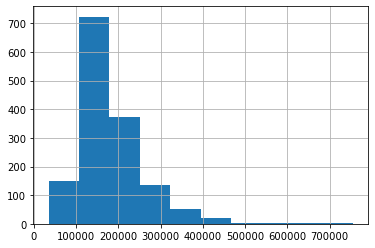

In [26]:
house['SalePrice'].hist();